### *Statistics for AI and Data Science*

by Danielle Souza Da Silva

 #### **Part 1: Calculating Morning and Evening Peak Proportions**

The Peak Counts dataframe which was created in this section contains five columns and the rows contain London underground stations. The columns include the AM Peak Count, the PM Peak Count, the Peak Count Total, the AM Proportion and the PM Proportion. I have included their definitions below:

- *AM Peak Count: Sum of exits from H07, H08, H09 AM peak hours.*
- *PM Peak Count: Sum of exits from H16, H17, H18 PM peak hours.*
- *Peak Count Total: Sum of all exits of the AM and PM peak counts.*
- *AM Proportion: Sum of exits during the AM peak counts hours divided by total count of exits.*
- *PM Proportion: Sum of exits during the PM peak counts hours divided by total count of exits.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')

In [3]:
total_exits = pd.DataFrame().assign(Total = exits.apply(sum, axis=1))
peak_counts = total_exits.copy()

In [4]:
peak_counts['AMPeak_Count'] = exits['H07'] + exits['H08'] + exits['H09'] 
peak_counts['PMPeak_Count'] = exits['H16'] + exits['H17'] + exits['H18'] 
peak_counts['AMProportion'] = peak_counts['AMPeak_Count']/total_exits['Total']
peak_counts['PMProportion'] = peak_counts['PMPeak_Count']/total_exits['Total']
peak_counts['PeakCount_Total'] = peak_counts['AMPeak_Count'] + peak_counts['PMPeak_Count']
del peak_counts['Total']

**Peak Counts dataframe**

In [5]:
peak_counts

,AMPeak_Count,PMPeak_Count,AMProportion,PMProportion,PeakCount_Total
Station,,,,,
Acton Town,1970,2628,0.210425,0.280709,4598
Aldgate,7408,2992,0.459098,0.185424,10400
Aldgate East,7618,3803,0.359238,0.179336,11421
Alperton,856,1847,0.167253,0.360883,2703
Amersham,424,1465,0.108579,0.375160,1889
...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,1611
Wood Green,2165,6494,0.114013,0.341987,8659
Wood Lane,1798,1766,0.272012,0.267171,3564


#### **Part 2: Plotting and Analysing Distributions**

The data in the histogram for the am proportion is positively skewed as most of the values are clustered on the right side of the histogram. It also shows that the proportion of exits are relatively larger for a smaller number of stations. On the other hand, the data in the pm proportion histogram shows a slight negative skew as the majority of values appear on the left, but it also shows that the proportions of exits are more evenly spread out. Comparing to the am proportion, the pm proportion histogram indicates that there are fewer stations where the number of exits are either too large or too small. In general, our histogram data shows that the am proportion histogram has a more spread out number of exits distribution, whereas the pm proportion histogram shows it has a less spread out distributed number of exits.

The statistics of our distribution tell us the following:

- The mean/average number of exits during the am peak hours are close to those of the pm peak hours. 
- The quartiles shows us that there are more people exiting stations during the pm peak hours compared to the am peak hours. 
- The minimum number of exits in the am peak hours are much smaller compared to the minimum of the pm peak hours. 

Our distributions imply a pattern of travel for both the am and pm peak hours. During the am peak hours there are a larger proportion of exits at fewer stations which may suggest that these are closer to work/study related places which most people are inclined to commute to during this time. However, during the pm peak hours the proportion of exits are more evenly spread out since there are much fewer stations where the number of exits are too large or too small. This may suggest that the stations in which people are exiting may be closer to residential areas, which people are more likely to be commuting to during this time. The maximum and minimum number of exits of both am and pm peak hours may suggest either that the stations which had these counts may be closer to work/residential areas or may be the final stop which means people need to exit/change stations to continue their travel. 

###### *Distribution details and histograms below*


**Distribution of the peak counts exit data**

In [6]:
peak_counts.describe()

,AMPeak_Count,PMPeak_Count,AMProportion,PMProportion,PeakCount_Total
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750,9027.324627
std,8181.784059,6276.463316,0.122161,0.087724,13148.675265
min,27.000000,239.000000,0.045302,0.084630,266.000000
25%,677.500000,1471.750000,0.116120,0.240947,2395.750000
50%,1517.000000,2622.000000,0.169378,0.307397,4457.500000
75%,4315.250000,4707.750000,0.266443,0.361596,9651.250000
max,61116.000000,59486.000000,0.630427,0.496079,82615.000000


**Histograms for the AM and PM Proportions**

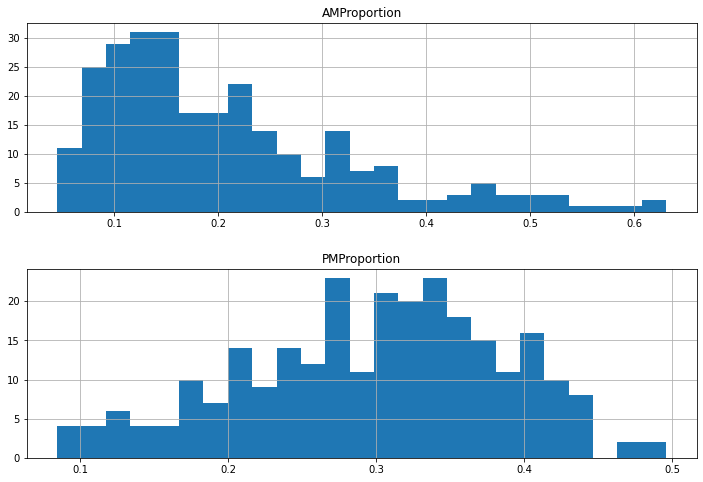

In [7]:
hist_plot = peak_counts.hist(figsize=(12,8), column=['AMProportion','PMProportion'], bins=25, layout=(2,1))

#### **Part 3: A simple Classification of Stations**

For the classification I have set a simple condition to distinguish stations which may be exited mainly for work, residential or other purposes. 

- 'Work' classification: for each station the AM proportion of exits must be larger than 1.5 times the PM proportion of exits.

- 'Residential' classification: for each station the PM proportion of exits must be larger than 1.5 times the AM proportion of exits.

- 'Other' classification: for each station the exits of both the AM and PM proportions of exits do not have the same conditions as the work and residential classifications.

Choosing these conditions made that most stations fell in the correct category which also shows the patterns which we indicated in the previous part. 

In [8]:
def Category(row):
    if (row.AMProportion > 1.5*row.PMProportion): return 'Work'
    if (row.PMProportion > 1.5*row.AMProportion): return 'Residential'
    else: return 'Other'
    
peak_counts.apply(Category, axis=1)
peak_counts = peak_counts.assign(Categories = peak_counts.apply(Category, axis=1))

**Peak Counts dataframe with Categories**

In [9]:
peak_counts

,AMPeak_Count,PMPeak_Count,AMProportion,PMProportion,PeakCount_Total,Categories
Station,,,,,,
Acton Town,1970,2628,0.210425,0.280709,4598,Other
Aldgate,7408,2992,0.459098,0.185424,10400,Work
Aldgate East,7618,3803,0.359238,0.179336,11421,Work
Alperton,856,1847,0.167253,0.360883,2703,Residential
Amersham,424,1465,0.108579,0.375160,1889,Residential
...,...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,1611,Residential
Wood Green,2165,6494,0.114013,0.341987,8659,Residential
Wood Lane,1798,1766,0.272012,0.267171,3564,Other


**Northern Line Station - Classifications**

The dataframe for the Northern line selected stations shows the categories which I was expecting for each station. For example: 

- The Archway station has double the number of exits in the afternoon compared to the morning, so it is expected that it is categorised as 'Residential'.

- The Groodge Street station has a lot more exits in the morning than in the afternoon which indicates that it may be mainly exited for work purposes. 

- Leicester Square and Embankment stations are categorised in 'Other' which is also expected since around these stations it is supposed to be busy at all times, especially since it is very close to many touristic attractions in London.

- The Morden station is also expected to be categorised as ' Residential' since it's not only got much higher number of exits during pm peak times than the am ones but it is also one of the final stops for the Northern line. 

**Data frame of the Northern Line Stations**

In [10]:
peak_counts.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square', 'Morden', 'South Wimbledon',
                 'Tottenham Court Road', 'Warren Street'],:]

,AMPeak_Count,PMPeak_Count,AMProportion,PMProportion,PeakCount_Total,Categories
Station,,,,,,
Archway,2190,4106,0.157158,0.294654,6296,Residential
Balham,2637,7635,0.119170,0.345038,10272,Residential
Embankment,10692,8829,0.316509,0.261360,19521,Other
Goodge Street,5374,1949,0.419287,0.152064,7323,Work
Highgate,893,3170,0.100101,0.355341,4063,Residential
High Barnet,987,2362,0.144235,0.345170,3349,Residential
Leicester Square,8952,12915,0.187390,0.270347,21867,Other
Morden,1550,5955,0.098852,0.379783,7505,Residential
South Wimbledon,1335,2198,0.185494,0.305405,3533,Residential
